# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

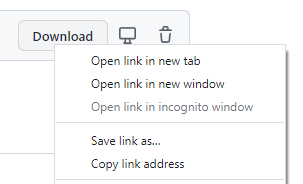

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

In [3]:
df = pd.read_csv('https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23/raw/main/Sharon_Nguyen.csv')

**Display the dataset (2 points)**

In [4]:
df

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,50.0,Male,Pacific Islander,Not Hispanic or Latino,190.0,60.0,never,6466.068,4830.153,3608.124,1395.708,Yes,27.596,No,Enalapril,No,Yes,No
1,40.0,Male,Asian,Not Hispanic or Latino,159.0,102.0,never,6144.961,4590.286,3428.944,1939.761,No,35.065,Yes,Enalapril,No,No,No
2,65.0,Male,Caucasian,Not Hispanic or Latino,180.0,52.0,former,8153.554,6090.705,4549.757,1394.455,Yes,28.313,Yes,Enalapril,No,No,No
3,67.0,Female,Unknown,Hispanic or Latino,164.0,45.0,never,6711.875,5013.771,3745.287,1793.870,Yes,29.851,No,Enalapril,No,No,No
4,40.0,Male,Black,Not Hispanic or Latino,157.0,81.0,former,5763.433,4305.284,3216.047,1618.859,Yes,25.248,Yes,Enalapril,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.0,Female,Unknown,Not Hispanic or Latino,184.0,110.0,never,7489.345,3991.821,2127.641,1573.221,Yes,29.141,Yes,Sacubitril-valsartan,No,No,No
996,44.0,Male,Caucasian,Not Hispanic or Latino,206.0,119.0,current,6035.551,3216.949,1714.634,1587.133,No,28.093,Yes,Sacubitril-valsartan,Yes,No,No
997,52.0,Female,Other,Not Hispanic or Latino,205.0,81.0,former,6369.342,3394.859,1809.460,1446.351,No,31.289,No,Sacubitril-valsartan,No,No,No
998,62.0,Female,Native American,Not Hispanic or Latino,208.0,71.0,never,5335.040,2843.576,1515.626,1432.972,No,33.927,Yes,Sacubitril-valsartan,No,No,No


## **Data cleaning (16 points)**


**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [5]:
df.isnull().sum()

Age                                       1
Sex                                       1
Race                                      0
Ethnicity                                 1
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     1
Left ventricular ejection fraction (%)    2
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   1
Hyperkalemia                              0
Death                                     0
dtype: int64

In [6]:
df_removed = df.dropna(how='any')
df_removed.isnull().sum()

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [7]:
# Filter based on inclusion criteria
df_filtered = df_removed[
    (df_removed['Age'] >= 18) &
    (df_removed['Pre-treatment NT-proBNP (pg/mL)'] >= 1600) &
    (df_removed['Pre-treatment BNP (pg/mL)'] >= 400) &
    (df_removed['Left ventricular ejection fraction (%)'] <= 40)
]

In [8]:
len(df_filtered)

868

In [9]:
#We can see a differenece between the amount of patients
len(df_removed)

993

**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [10]:
#df_filtered['BMI (kg/m^2)'] = 0
df_filtered.loc[:, 'BMI (kg/m^2)'] = df_filtered['Weight (kg)'] / ((df_filtered['Height (cm)'] / 100) ** 2)

df_filtered

<ipython-input-10-ea5179c54485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'BMI (kg/m^2)'] = df_filtered['Weight (kg)'] / ((df_filtered['Height (cm)'] / 100) ** 2)


,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2)
0,50.0,Male,Pacific Islander,Not Hispanic or Latino,190.0,60.0,never,6466.068,4830.153,3608.124,1395.708,Yes,27.596,No,Enalapril,No,Yes,No,16.620499
1,40.0,Male,Asian,Not Hispanic or Latino,159.0,102.0,never,6144.961,4590.286,3428.944,1939.761,No,35.065,Yes,Enalapril,No,No,No,40.346505
2,65.0,Male,Caucasian,Not Hispanic or Latino,180.0,52.0,former,8153.554,6090.705,4549.757,1394.455,Yes,28.313,Yes,Enalapril,No,No,No,16.049383
3,67.0,Female,Unknown,Hispanic or Latino,164.0,45.0,never,6711.875,5013.771,3745.287,1793.870,Yes,29.851,No,Enalapril,No,No,No,16.731112
4,40.0,Male,Black,Not Hispanic or Latino,157.0,81.0,former,5763.433,4305.284,3216.047,1618.859,Yes,25.248,Yes,Enalapril,Yes,No,No,32.861374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.0,Female,Unknown,Not Hispanic or Latino,184.0,110.0,never,7489.345,3991.821,2127.641,1573.221,Yes,29.141,Yes,Sacubitril-valsartan,No,No,No,32.490548
996,44.0,Male,Caucasian,Not Hispanic or Latino,206.0,119.0,current,6035.551,3216.949,1714.634,1587.133,No,28.093,Yes,Sacubitril-valsartan,Yes,No,No,28.042228
997,52.0,Female,Other,Not Hispanic or Latino,205.0,81.0,former,6369.342,3394.859,1809.460,1446.351,No,31.289,No,Sacubitril-valsartan,No,No,No,19.274242
998,62.0,Female,Native American,Not Hispanic or Latino,208.0,71.0,never,5335.040,2843.576,1515.626,1432.972,No,33.927,Yes,Sacubitril-valsartan,No,No,No,16.410873


In [11]:
#Saving as CSV file
df_filtered.to_csv('FilteredData.csv')

## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



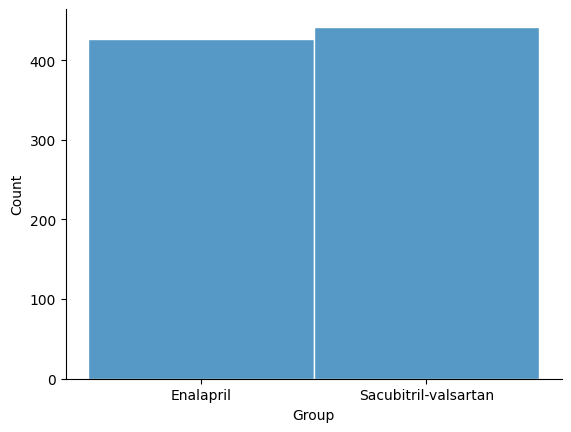

In [13]:
#printing histogram plot
Figure1 = sns.histplot(data=df_filtered, x='Group',edgecolor='white')

#Change plot axis' name
Figure1.set(xlabel='Group')
sns.despine()

#Saving Figure
plt.savefig("/content/Figure1.pdf", bbox_inches='tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [14]:
#Subset1
df_PreNT_and_Group = df_filtered[['Pre-treatment NT-proBNP (pg/mL)', 'Group']].copy()

#Subset2
df_Wk4NT_and_Group = df_filtered[['Week 4 NT-proBNP (pg/mL)', 'Group']].copy()

#Subset3
df_Wk8NT_and_Group = df_filtered[['Week 8 NT-proBNP (pg/mL)', 'Group']].copy()
df_Wk8NT_and_Group

,Week 8 NT-proBNP (pg/mL),Group
0,3608.124,Enalapril
1,3428.944,Enalapril
2,4549.757,Enalapril
3,3745.287,Enalapril
4,3216.047,Enalapril
...,...,...
995,2127.641,Sacubitril-valsartan
996,1714.634,Sacubitril-valsartan
997,1809.460,Sacubitril-valsartan
998,1515.626,Sacubitril-valsartan


2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [15]:
# Add a 'Timepoint' column to each DataFrame
df_PreNT_and_Group['Timepoint'] = 'Pre-treatment'
df_Wk4NT_and_Group['Timepoint'] = 'Week 4'
df_Wk8NT_and_Group['Timepoint'] = 'Week 8'

3) Merge all three of the new DataFrames via the most appropriate method. (6 points)

In [16]:
# Concatenate the three DataFrames vertically
df_merged = pd.concat([df_PreNT_and_Group, df_Wk4NT_and_Group, df_Wk8NT_and_Group], ignore_index=True)

# Display the merged DataFrame
df_merged

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,6466.068,Enalapril,Pre-treatment,NaN,NaN
1,6144.961,Enalapril,Pre-treatment,NaN,NaN
2,8153.554,Enalapril,Pre-treatment,NaN,NaN
3,6711.875,Enalapril,Pre-treatment,NaN,NaN
4,5763.433,Enalapril,Pre-treatment,NaN,NaN
...,...,...,...,...,...
2599,NaN,Sacubitril-valsartan,Week 8,NaN,2127.641
2600,NaN,Sacubitril-valsartan,Week 8,NaN,1714.634
2601,NaN,Sacubitril-valsartan,Week 8,NaN,1809.460
2602,NaN,Sacubitril-valsartan,Week 8,NaN,1515.626


4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [17]:
df_merged_filled = df_merged.fillna(0)
df_merged_filled

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,6466.068,Enalapril,Pre-treatment,0.0,0.000
1,6144.961,Enalapril,Pre-treatment,0.0,0.000
2,8153.554,Enalapril,Pre-treatment,0.0,0.000
3,6711.875,Enalapril,Pre-treatment,0.0,0.000
4,5763.433,Enalapril,Pre-treatment,0.0,0.000
...,...,...,...,...,...
2599,0.000,Sacubitril-valsartan,Week 8,0.0,2127.641
2600,0.000,Sacubitril-valsartan,Week 8,0.0,1714.634
2601,0.000,Sacubitril-valsartan,Week 8,0.0,1809.460
2602,0.000,Sacubitril-valsartan,Week 8,0.0,1515.626


5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [18]:
df_merged_filled['NT-proBNP'] = df_merged_filled['Pre-treatment NT-proBNP (pg/mL)'] + df_merged_filled['Week 4 NT-proBNP (pg/mL)'] + df_merged_filled['Week 8 NT-proBNP (pg/mL)']
df_merged_filled

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),NT-proBNP
0,6466.068,Enalapril,Pre-treatment,0.0,0.000,6466.068
1,6144.961,Enalapril,Pre-treatment,0.0,0.000,6144.961
2,8153.554,Enalapril,Pre-treatment,0.0,0.000,8153.554
3,6711.875,Enalapril,Pre-treatment,0.0,0.000,6711.875
4,5763.433,Enalapril,Pre-treatment,0.0,0.000,5763.433
...,...,...,...,...,...,...
2599,0.000,Sacubitril-valsartan,Week 8,0.0,2127.641,2127.641
2600,0.000,Sacubitril-valsartan,Week 8,0.0,1714.634,1714.634
2601,0.000,Sacubitril-valsartan,Week 8,0.0,1809.460,1809.460
2602,0.000,Sacubitril-valsartan,Week 8,0.0,1515.626,1515.626


In [20]:
#Saving as CSV file
df_merged_filled.to_csv('MergedData.csv')

6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-21-ae5116f3c793>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Timepoint', y='NT-proBNP', hue='Group', ci ='sd', err_style='bars', marker="o", data=df_merged_filled)


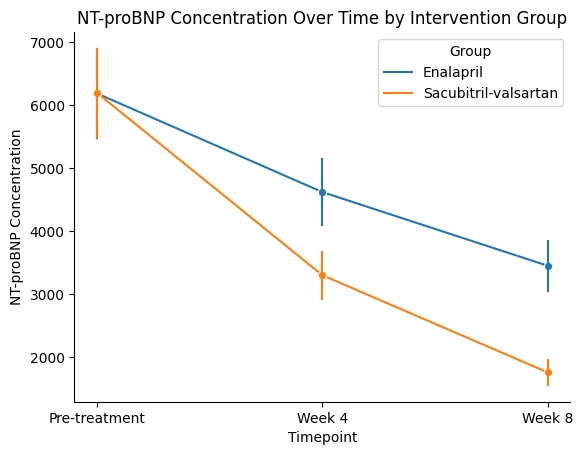

In [21]:
# Create a line plot
sns.lineplot(x='Timepoint', y='NT-proBNP', hue='Group', ci ='sd', err_style='bars', marker="o", data=df_merged_filled)

# Set plot labels and title
plt.xlabel('Timepoint')
plt.ylabel('NT-proBNP Concentration')
plt.title('NT-proBNP Concentration Over Time by Intervention Group')
sns.despine()

#Saving Figure
plt.savefig("/content/Figure2.pdf", bbox_inches='tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Convert your categorical data into matrix data. (4 points)

In [32]:
matrix_df = df_filtered.groupby(['Group', 'Race']).agg({'Week 8 NT-proBNP (pg/mL)': 'mean'}).reset_index()

matrixDF = matrix_df.pivot('Race','Group','Week 8 NT-proBNP (pg/mL)')
matrixDF

<ipython-input-32-d6672cac5860>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrixDF = matrix_df.pivot('Race','Group','Week 8 NT-proBNP (pg/mL)')


Group,Enalapril,Sacubitril-valsartan
Race,,
Asian,3493.181098,1758.250123
Black,3494.428710,1761.671611
Caucasian,3420.983190,1729.208086
Native American,3409.897097,1755.990154
Other,3440.774558,1772.518130
Pacific Islander,3437.400630,1783.413067
Unknown,3472.498837,1752.534213


In [33]:
#Saving Matrix
MatrixData = pd.DataFrame(matrixDF)
MatrixData.to_csv('MatrixData.csv')

2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

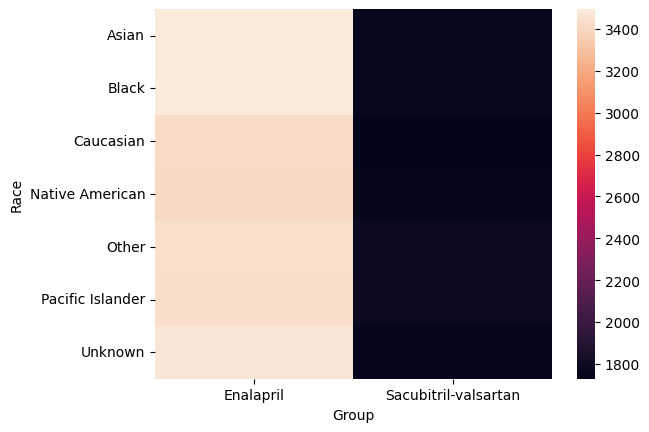

In [24]:
sns.heatmap(data=matrixDF)

#Saving Figure
plt.savefig("/content/Figure3.pdf", bbox_inches='tight')

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [36]:
# Filter for Sacubitril/Valsartan Intervention
sacubitril_df = df_filtered[df_filtered['Group'] == 'Sacubitril-valsartan']

# Define the characteristics of interest
characteristics = ['Age', 'Height (cm)', 'Weight (kg)', 'Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)', 'Pre-treatment BNP (pg/mL)', 'Left ventricular ejection fraction (%)', 'BMI (kg/m^2)']

# Calculate mean, std, and median for each characteristic
result_sacubitril = sacubitril_df[characteristics].aggregate(['mean', 'std', 'median'])

# Display the results
result_sacubitril

,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI (kg/m^2)
mean,48.977376,182.266968,80.156109,6193.546554,3301.160303,1759.518471,1534.959837,30.679509,24.826361
std,17.604098,17.318708,23.653883,696.008123,370.972333,197.728249,165.310509,4.020710,8.819135
median,49.000000,183.000000,81.000000,6064.394000,3232.322000,1722.828000,1500.356000,29.816500,24.459085


In [38]:
#Saving Results
result_sacubitril_df = pd.DataFrame(result_sacubitril)
result_sacubitril_df.to_csv('SacubitrilIntervention.csv')

In [30]:
# Filter for Sacubitril/Valsartan Intervention
enalapril_df = df_filtered[df_filtered['Group'] == 'Enalapril']

# Define the characteristics of interest
characteristics = ['Age', 'Height (cm)', 'Weight (kg)', 'Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)', 'Pre-treatment BNP (pg/mL)', 'Left ventricular ejection fraction (%)', 'BMI (kg/m^2)']

# Calculate mean, std, and median for each characteristic
result_enalapril = enalapril_df[characteristics].aggregate(['mean', 'std', 'median'])

# Display the results
result_enalapril

,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI (kg/m^2)
mean,49.497653,181.708920,77.77230,6183.710401,4619.231669,3450.566038,1540.219115,31.031333,24.287722
std,18.198933,18.053379,22.65947,702.266635,524.593166,391.871104,179.403233,4.067272,8.723676
median,51.000000,181.000000,77.00000,6108.900000,4563.348500,3408.821000,1501.774000,30.528500,23.573664


In [37]:
#Saving Results
result_enalapril_df = pd.DataFrame(result_enalapril)
result_enalapril_df.to_csv('EanaprilIntervention.csv')

What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:

1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)
   

<font color='red'>Null and alternative hypotheses for #1.</font>

𝐻0 (null hypothesis): **μ(preteatment) ≠ μ(Wk4)** ; There is no significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 4 measurements for individuals treated with Sacubitril/Valsartan

𝐻1: **μ < 70** ; **μ(preteatment) > μ(Wk4)** ; There is a significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 4 measurements for individuals treated with Sacubitril/Valsartan

In [39]:
##FOR NUMBER 1 - Paired T-test:

stats.ttest_rel(sacubitril_df['Pre-treatment NT-proBNP (pg/mL)'],sacubitril_df['Week 4 NT-proBNP (pg/mL)'])

TtestResult(statistic=187.0838244205118, pvalue=0.0, df=441)

<font color='red'>Null and alternative hypotheses for #2.</font>

𝐻0 (null hypothesis): **μ(preteatment) ≠ μ(Wk8)** ; There is no significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 8 measurements for individuals treated with Sacubitril/Valsartan

𝐻1: **μ < 70** ; **μ(preteatment) > μ(Wk8)** ; There is a significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 8 measurements for individuals treated with Sacubitril/Valsartan

In [40]:
##FOR NUMBER 2 - Paired T-test:

stats.ttest_rel(sacubitril_df['Pre-treatment NT-proBNP (pg/mL)'],sacubitril_df['Week 8 NT-proBNP (pg/mL)'])

TtestResult(statistic=187.08381960859867, pvalue=0.0, df=441)

<font color='red'>Null and alternative hypotheses for #3.</font>

𝐻0 (null hypothesis): **μ(preteatment) ≠ μ(Wk4)** ; There is no significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 4 measurements for individuals treated with Enalapril

𝐻1: **μ < 70** ; **μ(preteatment) > μ(Wk4)** ; There is a significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 4 measurements for individuals treated with Enalapril

In [41]:
##FOR NUMBER 3 - Paired T-test:

stats.ttest_rel(enalapril_df['Pre-treatment NT-proBNP (pg/mL)'],enalapril_df['Week 4 NT-proBNP (pg/mL)'])

TtestResult(statistic=181.74056816560264, pvalue=0.0, df=425)

<font color='red'>Null and alternative hypotheses for #4.</font>

𝐻0 (null hypothesis): **μ(preteatment) ≠ μ(Wk8)** ; There is no significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 4 measurements for individuals treated with Enalapril

𝐻1: **μ < 70** ; **μ(preteatment) > μ(Wk8)** ; There is a significant difference in the mean NT-proBNP concentrations between the pre-treatment and Week 4 measurements for individuals treated with Enalapril

In [42]:
##FOR NUMBER 4 - Paired T-test:

stats.ttest_rel(enalapril_df['Pre-treatment NT-proBNP (pg/mL)'],enalapril_df['Week 8 NT-proBNP (pg/mL)'])

TtestResult(statistic=181.740580865337, pvalue=0.0, df=425)

<font color='red'>Null and alternative hypotheses for #5.</font>

𝐻0 (null hypothesis): The variance among NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) are equal

𝐻1: The variance among NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) are not equal for at least one pair


In [43]:
##FOR NUMBER 5 - Levene's test of Equal Variance:
stats.levene(sacubitril_df['Week 4 NT-proBNP (pg/mL)'], enalapril_df['Week 4 NT-proBNP (pg/mL)'])

LeveneResult(statistic=41.44121784141713, pvalue=2.0099853276854137e-10)

<font color='red'>Null and alternative hypotheses for #6.</font>

𝐻0 (null hypothesis): The variance among NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril) are equal

𝐻1: The variance among NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril) are not equal for at least one pair

In [44]:
##FOR NUMBER 6 - Levene's test of Equal Variance:
stats.levene(sacubitril_df['Week 8 NT-proBNP (pg/mL)'], enalapril_df['Week 8 NT-proBNP (pg/mL)'])

LeveneResult(statistic=145.5348379784601, pvalue=4.361904334401239e-31)

<font color='red'>Null and alternative hypotheses for #7.</font>

𝐻0 (null hypothesis): There is no significant difference in the mean NT-proBNP levels at Week 4 between the two groups (Sacubitril and Enalapril) among participants aged 60 or older.

𝐻1: There is a significant difference in the mean NT-proBNP levels at Week 4 between the two groups (Sacubitril and Enalapril) among participants aged 60 or older.

In [45]:
##FOR NUMBER 7 - Welch's test:
sacubitril_df2 = sacubitril_df[
    (sacubitril_df['Age'] >= 60)]

enalapril_df2 = enalapril_df[
    (enalapril_df['Age'] >= 60)]

stats.levene(sacubitril_df2['Week 4 NT-proBNP (pg/mL)'], enalapril_df2['Week 4 NT-proBNP (pg/mL)'])

LeveneResult(statistic=17.591842935466698, pvalue=3.621310174459361e-05)

In [46]:
##FOR NUMBER 7 - Welch's test:
stats.ttest_ind(sacubitril_df2['Week 4 NT-proBNP (pg/mL)'].dropna(), enalapril_df2['Week 4 NT-proBNP (pg/mL)'].dropna(), alternative = 'greater', equal_var=False)

TtestResult(statistic=-23.57190783745323, pvalue=1.0, df=266.1684273315103)

<font color='red'>Null and alternative hypotheses for #8.</font>

𝐻0 (null hypothesis): There is no significant difference in the mean NT-proBNP levels at Week 8 between the two groups (Sacubitril and Enalapril) among participants aged 60 or older.

𝐻1: There is a significant difference in the mean NT-proBNP levels at Week 8 between the two groups (Sacubitril and Enalapril) among participants aged 60 or older.

In [47]:
##FOR NUMBER 8 - Welch's test:
stats.levene(sacubitril_df2['Week 8 NT-proBNP (pg/mL)'], enalapril_df2['Week 8 NT-proBNP (pg/mL)'])

LeveneResult(statistic=56.48992230266363, pvalue=6.755341926119035e-13)

In [48]:
##FOR NUMBER 8 - Welch's test:
stats.ttest_ind(sacubitril_df2['Week 8 NT-proBNP (pg/mL)'].dropna(), enalapril_df2['Week 8 NT-proBNP (pg/mL)'].dropna(), alternative = 'greater', equal_var=False)

TtestResult(statistic=-44.685170294611744, pvalue=1.0, df=218.5609395276495)

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

_**[ Write your answer here ]**_

###**Publication on GitHub**

In [49]:
%%bash
rm -r sample_data

#Making Structure depicted in diagram
mkdir startingData
mkdir code
mkdir results
mkdir figures

In [50]:
%%bash
#Adding README
cat > README.md
This contains startingData, code, results, figures.

In [ ]:
mv FilteredData.csv /content/startingData

In [ ]:
mv Sharon_Nguyen_Lab09_AdditionalStatisticsAndReview.ipynb /content/code